In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve,auc
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
input_dict = {'TFBS': '../TFBS_analysis/analysis/classification/TFBS_log_reg_bootstrap/TFBS_results/',
              'TFBS_short_fragments': '../TFBS_short_analysis/analysis/classification/TFBS_short_log_reg_bootstrap/TFBS_short_results/',
              'TFBS_0.1X': '../downsampled/analysis/classification/downsampled_log_reg_bootstrap/downsampled_results/',
              'TFBS_Ulz':'../Ulz_analysis/classification/Ulz_log_reg_bootstrap/Ulz_results/',
              'TFBS_Ulz_0.1X': '../Ulz_downsampled_analysis/classification/Ulz_downsampled_log_reg_bootstrap/Ulz_downsampled_results/'}

sample_types = ['Bile_Duct_Cancer', 'Breast_Cancer', 'Colorectal_Cancer',
       'Gastric_cancer', 'Lung_Cancer', 'Ovarian_Cancer',
       'Pancreatic_Cancer', 'overall']

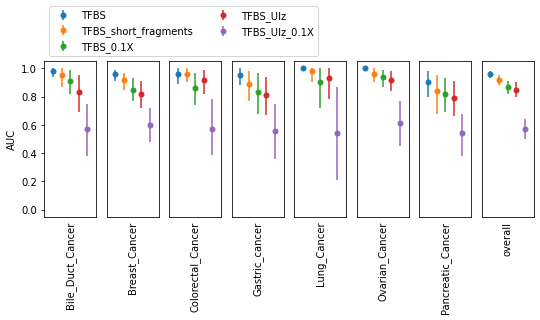

In [5]:
# set width of bar
barWidth = 0.12
fig,axes = plt.subplots(1,8,figsize = (8,4.5), sharey = True)
# br = np.arange(len(sample_types)-1)
# br = np.append(br,8)

for i,approach in enumerate(['TFBS','TFBS_short_fragments','TFBS_0.1X','TFBS_Ulz','TFBS_Ulz_0.1X']):  
    CI_data = pd.read_csv(input_dict[approach]+'CI_metrics.txt', sep='\t')
    CI_data = CI_data.set_index('group')
    CI_data = CI_data.loc[sample_types]

    CI_data = np.round(CI_data,2)

    lower = CI_data['mean']-CI_data['lower']
    upper = CI_data['upper']-CI_data['mean']
#     print(approach)
#     print(CI_data) 
#     print('\n')
    
    for j,cancer_type in enumerate(sample_types):
        ax = axes[j]
        mean = CI_data['mean'][cancer_type]
        current_lower = lower[cancer_type]
        current_upper = upper[cancer_type]

        CI_values = np.array([[current_lower,current_upper]]).T

        br1 = i*barWidth
        rects = ax.errorbar(br1, mean, yerr=CI_values, label = approach, fmt='o', markersize = 5)
        
        ax.set_xlabel(cancer_type, rotation = 90)

axes[0].set_ylabel('AUC')

for ax in axes:
    ax.tick_params(bottom = False, labelbottom = False, left = False, labelleft = False)
    ax.set_xlim(-0.124, 0.604)
axes[0].tick_params(left = True, labelleft = True)

plt.tick_params(axis = 'x', rotation=90, bottom=False)
plt.ylim(-.05,1.05)
axes[0].legend(loc='lower left',bbox_to_anchor = [0,1], ncol = 2)
# fig.tight_layout()
fig.subplots_adjust(bottom =.32, top = .8, left = .1, right = .95)
plt.savefig('cancer_detection_AUC_barplot_with_CI_v2.pdf')